# Dependencies
- Remove '#' to installl the needed depencies.

In [1]:
# !pip install "dandi>=0.13.0"
# !pip install -U pynwb

# Downloading the Session (Time-Series Data)

In [2]:
# !dandi download https://api.dandiarchive.org/api/dandisets/000363/versions/0.230808.2053/assets/758e41bf-22f7-48e4-a88e-0195acf2a52c

# Reading The Data and Data Exploration
- Using pynwb

In [13]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import ast
#Reading single session file
from nwbwidgets import nwb2widget

In [4]:
#Looking into behavioural events
with NWBHDF5IO("../M440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    
    print(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["left_lick_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["right_lick_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["photostim_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["photostim_stop_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"])
    print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"])

delay_start_times pynwb.base.TimeSeries at 0x1717443948400
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (395,), type "<f8">
  description: Timestamps for event type: delay - Start Time
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (395,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

delay_stop_times pynwb.base.TimeSeries at 0x1717444035344
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (395,), type "<f8">
  description: Timestamps for event type: delay - Stop Time
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (395,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

go_start_times pynwb.base.TimeSeries at 0x1717444103808
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (368,), type "<f8">
  description: Timestamps for event type: go - Start Time
  interval: 1
  of

In [5]:
with NWBHDF5IO("../M440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    print("Control : ",read_nwbfile.acquisition["BehavioralEvents"]["photostim_stop_times"].control[:])
    print("Control_Description : ",read_nwbfile.acquisition["BehavioralEvents"]["photostim_stop_times"].control_description[:])
    print(read_nwbfile.acquisition["BehavioralEvents"]["photostim_stop_times"].data[:])
    print(read_nwbfile.acquisition["BehavioralEvents"]["photostim_stop_times"].timestamps[:])
    print(read_nwbfile.acquisition["BehavioralEvents"]["photostim_start_times"].timestamps[:])
    print(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])

Control :  [4 6 6 6 6 6 6 6 6 6 4 6 6 4 4 4 6 4 6 6 4 4 6 4 6 6 6 6 4 4 6 4 6 6 6 4 6
 6 6 6 4 6 6 6 4 6 4 4 6 6 6 4 6 6 4 6 6 4 4 6 6 6 4 4 6 4 6 6 4 6 6 6 4 4
 6 6 6 6]
Control_Description :  ['4' '6']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[ 464.0771  469.5859  489.0208  518.8604  524.7695  532.818   539.4868
  584.7115  620.7822  634.8275  647.1866  727.3113  733.1188  746.5409
  764.6186  815.5676  847.9374  879.3693  893.0912  905.8148  947.2054
  959.0518 1010.7928 1017.7515 1023.3862 1032.1681 1039.328  1047.4086
 1072.8455 1135.8808 1149.5133 1255.0514 1275.7571 1289.0814 1304.2492
 1310.0095 1316.9411 1323.0212 1363.4249 1371.6464 1417.7644 1437.8161
 1444.7296 1458.8578 1471.525  1492.2944 1533.4123 1566.6382 1601.3476
 1613.1031 1652.6473 1672.5447 1745.9064 1751.6554 1799.0209

# Visualizing Jaw movement

In [6]:
with NWBHDF5IO("../M440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    
    Test_data0 = read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_JawTracking"].data[list(range(0,10000))]
    Test_data1 = read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_NoseTracking"].data[list(range(0,10000))]
    Test_data2 = read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_TongueTracking"].data[list(range(0,10000))]

    print(read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_JawTracking"])
    print(read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_NoseTracking"])
    print(read_nwbfile.acquisition["BehavioralTimeSeries"]["Camera0_side_TongueTracking"])

Camera0_side_JawTracking pynwb.base.TimeSeries at 0x1717445641600
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (680500, 3), type "<f8">
  description: Time series for JawTracking position: ('jaw_x', 'jaw_y', 'jaw_likelihood')
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (680500,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

Camera0_side_NoseTracking pynwb.base.TimeSeries at 0x1717445844608
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (680500, 3), type "<f8">
  description: Time series for NoseTracking position: ('nose_x', 'nose_y', 'nose_likelihood')
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (680500,), type "<f8">
  timestamps_unit: seconds
  unit: a.u.

Camera0_side_TongueTracking pynwb.base.TimeSeries at 0x1717445849344
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "d

In [72]:
Jaw_data0 = pd.DataFrame(np.array(Test_data0))
Jaw_data0 = Jaw_data0[[0,1]]
Nose_data1 = pd.DataFrame(np.array(Test_data1))
Nose_data1 = Nose_data1[[0,1]]
Tongue_data2 = pd.DataFrame(np.array(Test_data2))
Tongue_data2 = Tongue_data2[[0,1]]

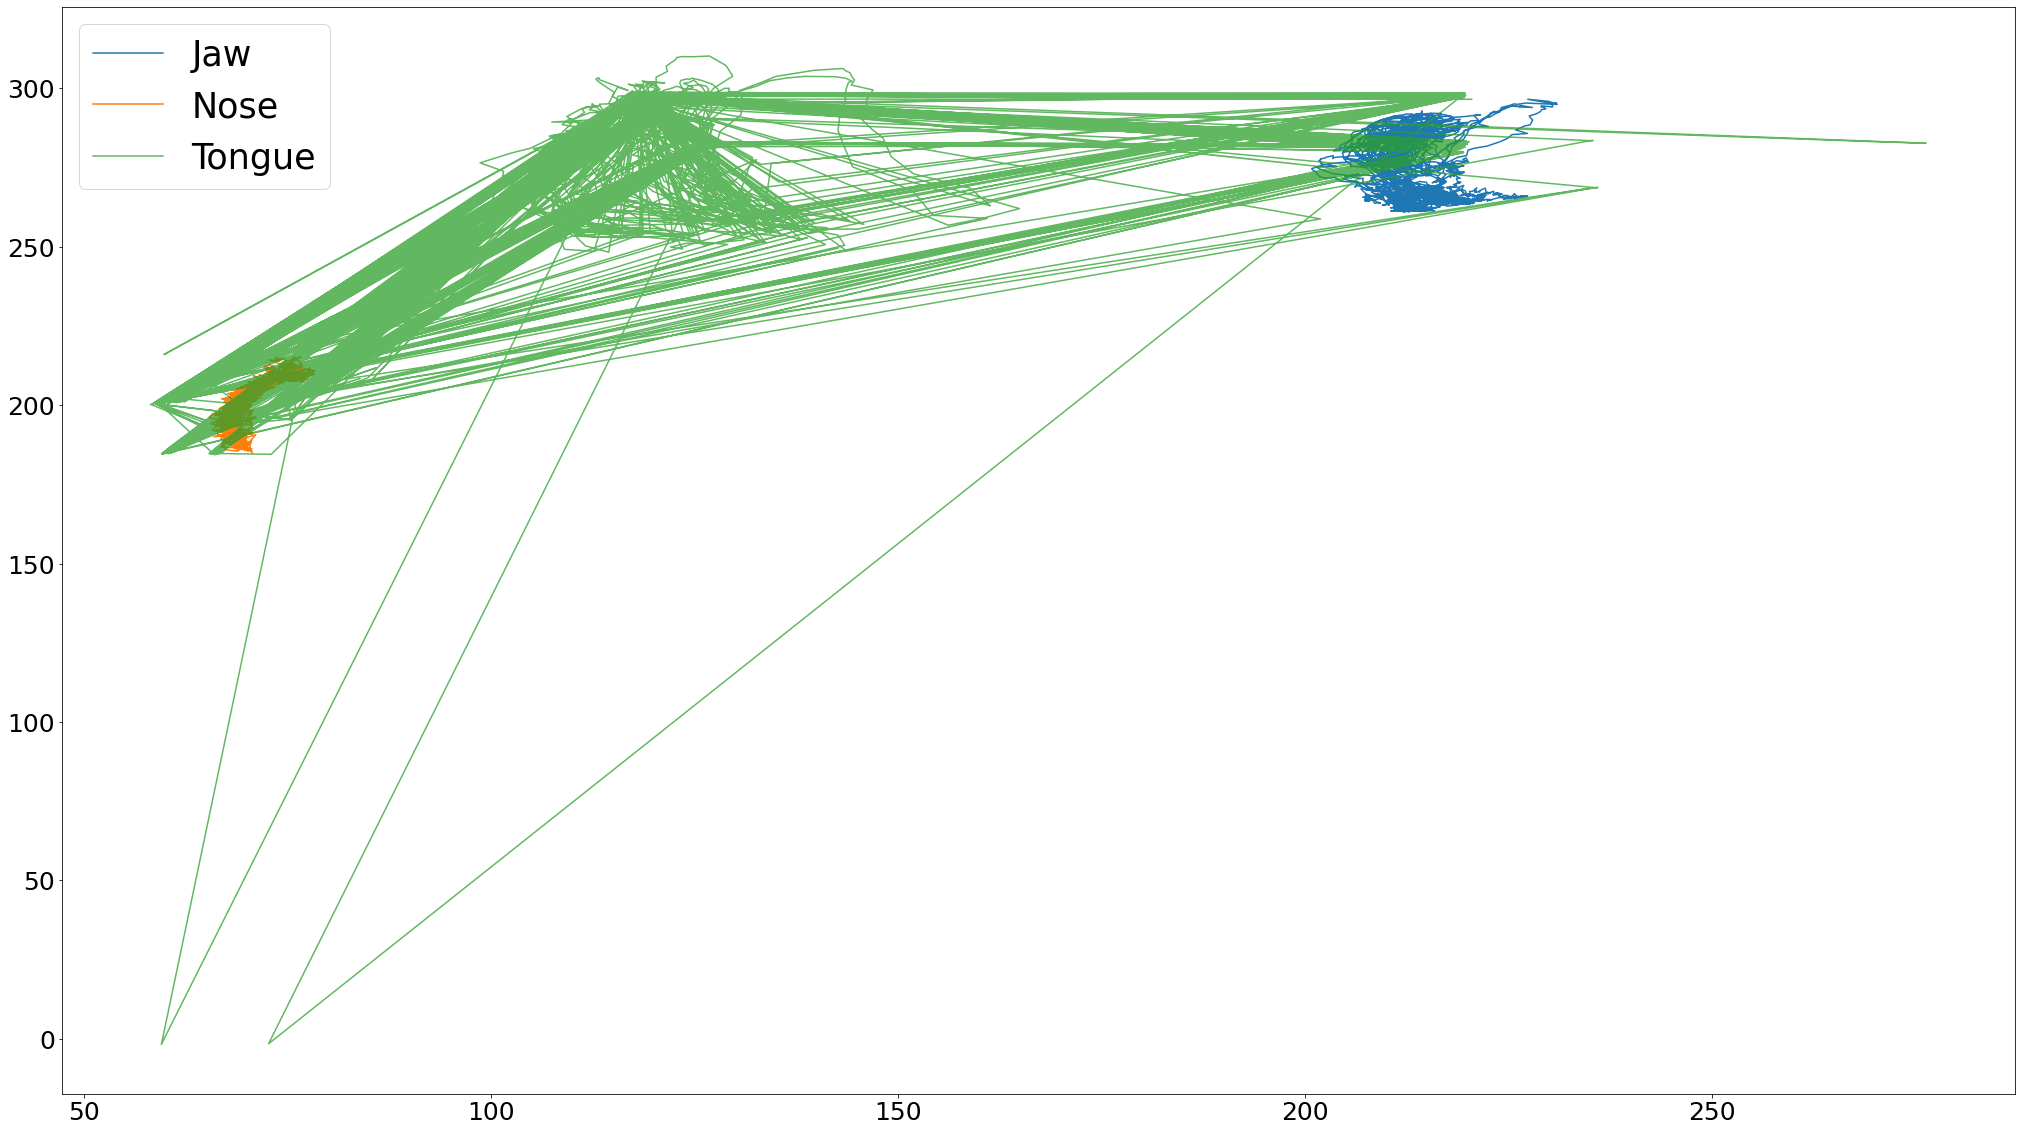

In [73]:
plt.figure(figsize=(35,20))
plt.plot(Jaw_data0[[0]],Jaw_data0[[1]])
plt.plot(Nose_data1[[0]],Nose_data1[[1]])
plt.plot(Tongue_data2[[0]],Tongue_data2[[1]],alpha=0.75)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(["Jaw","Nose","Tongue"],fontsize=35)
plt.show()


# Exploring functionalies of nwb module

In [ ]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("../M440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [17]:
nwbfile.fields

{'session_description': '',
 'identifier': 'SC015_20190207_120657_s1',
 'session_start_time': datetime.datetime(2019, 2, 7, 12, 6, 57, tzinfo=tzoffset(None, -21600)),
 'timestamps_reference_time': datetime.datetime(2019, 2, 7, 12, 6, 57, tzinfo=tzoffset(None, -21600)),
 'file_create_date': [datetime.datetime(2023, 8, 7, 10, 57, 34, 448450, tzinfo=tzoffset(None, -18000))],
 'experimenter': ('susu',),
 'related_publications': ('',),
 'acquisition': {'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x2875855603648
  Fields:
    time_series: {
      delay_start_times <class 'pynwb.base.TimeSeries'>,
      delay_stop_times <class 'pynwb.base.TimeSeries'>,
      go_start_times <class 'pynwb.base.TimeSeries'>,
      go_stop_times <class 'pynwb.base.TimeSeries'>,
      left_lick_times <class 'pynwb.base.TimeSeries'>,
      photostim_start_times <class 'pynwb.base.TimeSeries'>,
      photostim_stop_times <class 'pynwb.base.TimeSeries'>,
      presample_start_times <class 

In [18]:
nwbfile.subject

subject pynwb.file.Subject at 0x2875855842080
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC015
  sex: M
  species: Mus musculus
  subject_id: 440956

In [19]:
nwbfile.intervals
#details about experiment

{'trials': trials pynwb.epoch.TimeIntervals at 0x2875855760160
 Fields:
   colnames: ['start_time' 'stop_time' 'trial' 'photostim_onset' 'photostim_power'
  'photostim_duration' 'trial_uid' 'task' 'task_protocol'
  'trial_instruction' 'early_lick' 'outcome' 'auto_water' 'free_water']
   columns: (
     start_time <class 'hdmf.common.table.VectorData'>,
     stop_time <class 'hdmf.common.table.VectorData'>,
     trial <class 'hdmf.common.table.VectorData'>,
     photostim_onset <class 'hdmf.common.table.VectorData'>,
     photostim_power <class 'hdmf.common.table.VectorData'>,
     photostim_duration <class 'hdmf.common.table.VectorData'>,
     trial_uid <class 'hdmf.common.table.VectorData'>,
     task <class 'hdmf.common.table.VectorData'>,
     task_protocol <class 'hdmf.common.table.VectorData'>,
     trial_instruction <class 'hdmf.common.table.VectorData'>,
     early_lick <class 'hdmf.common.table.VectorData'>,
     outcome <class 'hdmf.common.table.VectorData'>,
     auto_water <

In [ ]:
# Extract the trials dataframe from nwb file
trials_df = nwbfile.trials.to_dataframe()
trials_df

In [ ]:
# Extract the units dataframe from nwb file
units_df = nwbfile.units.to_dataframe()
units_df

In [68]:
# Electrode has information about Co-ordination and Location(brain regions)
units_df.loc[0].electrodes

,location,group,group_name,electrode,shank,shank_col,shank_row,x,y,z,imp,filtering,rel_x,rel_y,rel_z
id,,,,,,,,,,,,,,,
0,"{""brain_regions"": ""left ALM"", ""skull_reference...",17131309211 1-281 pynwb.ecephys.ElectrodeGroup...,17131309211 1-281,1,1,1,1,6760.0,4220.0,3120.0,-1.0,,16.0,0.0,NaN


In [75]:
units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

left ALM          674
right Striatum    489
right ALM         409
left Striatum     380
Name: electrodes, dtype: int64

In [26]:
ast.literal_eval(units_df.electrodes.values[800]["location"].values[0])
#Accessing part-of-the-brain(Need to know unique part of brains) & Coordinates

{'brain_regions': 'right ALM',
 'skull_reference': 'Bregma',
 'ap_location': '2500.00',
 'ml_location': '1500.00',
 'depth': '-2600.00',
 'theta': '15.00',
 'phi': '45.00',
 'beta': '-45.00'}

# CCF co-ordinates

In [ ]:
def get_ccf(unit_number):
    x = float(units_df.electrodes[unit_number].reset_index().x.values)
    y = float(units_df.electrodes[unit_number].reset_index().y.values)
    z = float(units_df.electrodes[unit_number].reset_index().z.values)
    return x, y, z
x_ccf, y_ccf, z_ccf = get_ccf(unit_number=150)

print(f"x_ccf = {x_ccf}")
print(f"y_ccf = {y_ccf}")
print(f"z_ccf = {z_ccf}")

In [ ]:
#Querying the data as per the need (Only Successful attempts are being considered here)
trials = trials_df.query("photostim_onset != 'N/A' and (outcome == 'hit' or outcome == 'miss')")
units = units_df.query("classification == 'good'").reset_index()
units

In [ ]:
trials

## Making Data Useable(Cleaning)

In [20]:
with NWBHDF5IO("D:\\Mesoscale-Activity-Analysis\\NWBdata\\sub-440956/sub-440956_ses-20190207T120657_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()

    pre_start = read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:]
    pre_stop = read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:]
    sample_start = read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:]
    sample_stop = read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:]
    delay_start = read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:]
    delay_stop = read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:]
    go_start = read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:]
    go_stop = read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:]
    trials_df = read_nwbfile.trials.to_dataframe()
    units_df = read_nwbfile.units.to_dataframe()
    trials = trials_df.query("photostim_onset != 'N/A' and (outcome == 'hit' or outcome == 'miss')")
    units = units_df.query("classification == 'good'").reset_index()
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    sample_start = np.intersect1d(pre_stop, sample_start)
    sample_stop = np.intersect1d(sample_stop, delay_start)
    delay_start = np.intersect1d(delay_start, sample_stop)
    delay_stop = np.intersect1d(delay_stop, go_start)
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

print(pre_stop[:5])
print(sample_start[:5])
print(sample_stop[:5])
print(delay_start[:5])
print(delay_stop[:5])
print(go_start[:5])
print(go_stop[:5])

[ 1.2115  7.8919 15.4514 25.3602 32.4794]
[ 1.2115  7.8919 15.4514 25.3602 32.4794]
[ 1.8615  9.2911 16.1014 26.0102 34.0372]
[ 1.8615  9.2911 16.1014 26.0102 34.0372]
[ 3.0615 10.4911 17.3014 27.2102 35.2372]
[ 3.0615 10.4911 17.3014 27.2102 35.2372]
[ 4.5615 11.9911 18.8014 28.7102 36.7372]


In [22]:
# Adding Epoch's Start-Stop time pair to each trial
trials_df = trials_df.assign(pre_start = pre_start,
                             pre_stop = pre_stop,
                             sample_start = sample_start,
                             sample_stop = sample_stop,
                             delay_start = delay_start,
                             delay_stop = delay_stop,
                             go_start = go_start,
                             go_stop = go_stop)
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
0,0.0000,4.8615,1,N/A,N/A,N/A,1,audio delay,1,right,...,0,0,0.5000,1.2115,1.2115,1.8615,1.8615,3.0615,3.0615,4.5615
1,6.6536,12.2911,2,N/A,N/A,N/A,2,audio delay,1,right,...,0,0,7.1536,7.8919,7.8919,9.2911,9.2911,10.4911,10.4911,11.9911
2,14.0799,20.0728,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,14.5799,15.4514,15.4514,16.1014,16.1014,17.3014,17.3014,18.8014
3,24.0631,29.1689,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
4,31.1768,37.0372,5,N/A,N/A,N/A,5,audio delay,1,right,...,0,0,31.6768,32.4794,32.4794,34.0372,34.0372,35.2372,35.2372,36.7372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2458.4032,2463.4609,364,2.058,5.500,0.5000,364,audio delay,1,right,...,0,0,2458.9032,2459.8109,2459.8109,2460.4609,2460.4609,2461.6609,2461.6609,2463.1609
364,2465.6248,2470.6032,365,N/A,N/A,N/A,365,audio delay,1,right,...,0,0,2466.1248,2466.9532,2466.9532,2467.6032,2467.6032,2468.8032,2468.8032,2470.3032
365,2472.7641,2477.7751,366,N/A,N/A,N/A,366,audio delay,1,right,...,0,0,2473.2641,2474.1251,2474.1251,2474.7751,2474.7751,2475.9751,2475.9751,2477.4751


In [24]:
# Adding Region(Part-of-brain information) into Unit DataFrame
units_df['Region'] = units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])

## Spike Rate Plotting

In [26]:
trials_Data = trials_df.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df.query(" Region == 'right ALM'")

In [29]:
trials_Data

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
2,14.0799,20.0728,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,14.5799,15.4514,15.4514,16.1014,16.1014,17.3014,17.3014,18.8014
3,24.0631,29.1689,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
8,60.1410,65.1748,9,N/A,N/A,N/A,9,audio delay,1,right,...,0,0,60.6410,61.3605,61.3605,62.0105,62.0105,63.2105,63.2105,64.7105
14,103.7123,109.4542,15,N/A,N/A,N/A,15,audio delay,1,right,...,1,0,104.2123,104.9100,104.9100,105.5600,105.5600,106.7600,106.7600,108.2600
25,173.7197,178.9643,26,N/A,N/A,N/A,26,audio delay,1,left,...,1,0,174.2197,174.9517,174.9517,175.6017,175.6017,176.8017,176.8017,178.3017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2127.3987,2132.3145,316,N/A,N/A,N/A,316,audio delay,1,left,...,0,0,2127.8987,2128.6802,2128.6802,2129.3302,2129.3302,2130.5302,2130.5302,2132.0302
316,2134.9705,2140.4990,317,N/A,N/A,N/A,317,audio delay,1,left,...,0,0,2135.4705,2136.3582,2136.3582,2137.0082,2137.0082,2138.8126,2138.8126,2140.3126
317,2142.6101,2147.5950,318,N/A,N/A,N/A,318,audio delay,1,right,...,0,0,2143.1101,2143.8363,2143.8363,2144.4863,2144.4863,2145.6863,2145.6863,2147.1863


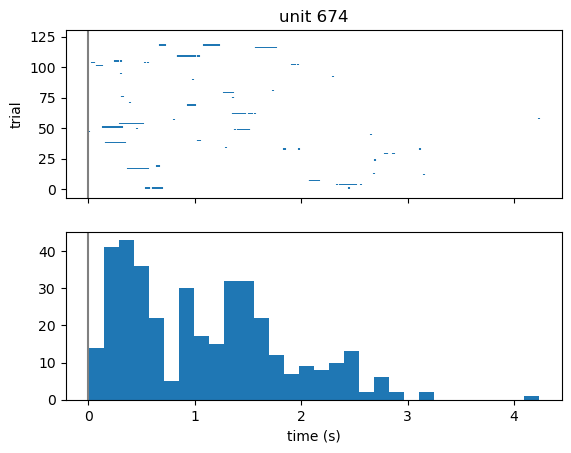

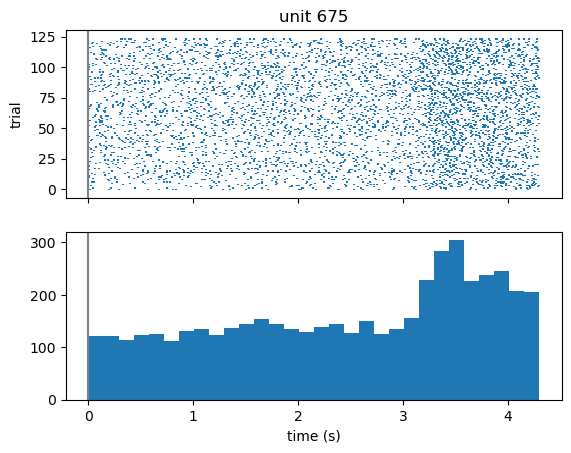

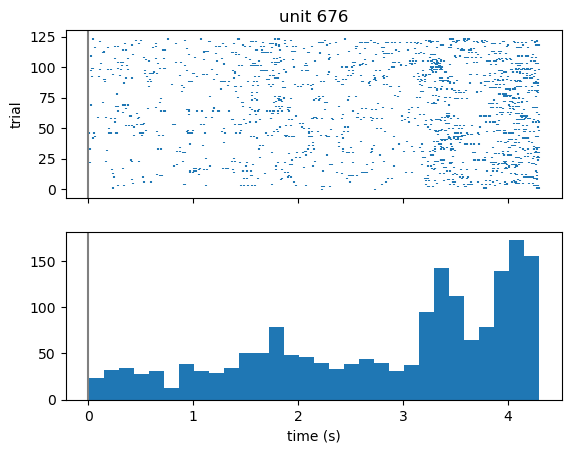

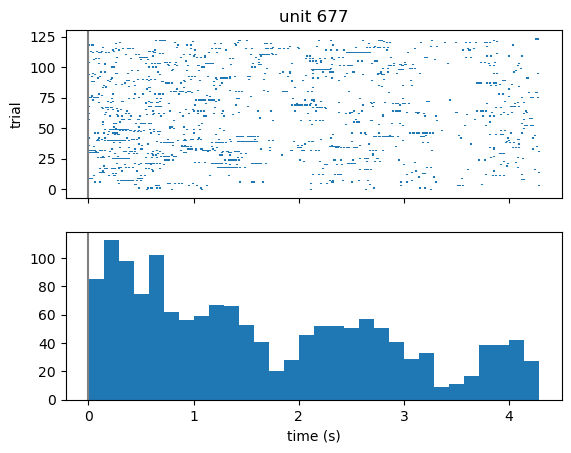

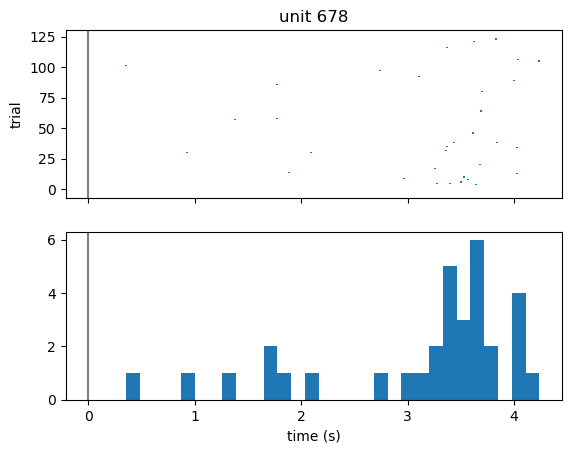

In [31]:
before = -0.7  # in seconds
after = 4.3

# Get the stimulus times for all stimuli
stim_on_times =trials_Data["start_time"]

for unit in range(674,679):
    unit_spike_times = units_Data["spike_times"][unit]
    trial_spikes = []
    for time in stim_on_times:
        # Spike times into trials
        aligned_spikes = unit_spike_times - time
        aligned_spikes = aligned_spikes[aligned_spikes < after]
        aligned_spikes = aligned_spikes[before < aligned_spikes]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    axs[0].eventplot(trial_spikes)

    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])
    

    axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])

# New data based on Delay epoch range [1.0,1.2]sec




In [33]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
3,24.0631,29.1689,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
8,60.1410,65.1748,9,N/A,N/A,N/A,9,audio delay,1,right,...,0,0,60.6410,61.3605,61.3605,62.0105,62.0105,63.2105,63.2105,64.7105
25,173.7197,178.9643,26,N/A,N/A,N/A,26,audio delay,1,left,...,1,0,174.2197,174.9517,174.9517,175.6017,175.6017,176.8017,176.8017,178.3017
27,190.8164,195.7693,28,N/A,N/A,N/A,28,audio delay,1,left,...,0,0,191.3164,192.0574,192.0574,192.7074,192.7074,193.9074,193.9074,195.4074
32,224.4209,229.2842,33,N/A,N/A,N/A,33,audio delay,1,left,...,0,0,224.9209,225.6153,225.6153,226.2653,226.2653,227.4653,227.4653,228.9653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2100.5730,2105.4467,312,N/A,N/A,N/A,312,audio delay,1,left,...,0,0,2101.0730,2101.8663,2101.8663,2102.5163,2102.5163,2103.7163,2103.7163,2105.2163
315,2127.3987,2132.3145,316,N/A,N/A,N/A,316,audio delay,1,left,...,0,0,2127.8987,2128.6802,2128.6802,2129.3302,2129.3302,2130.5302,2130.5302,2132.0302
317,2142.6101,2147.5950,318,N/A,N/A,N/A,318,audio delay,1,right,...,0,0,2143.1101,2143.8363,2143.8363,2144.4863,2144.4863,2145.6863,2145.6863,2147.1863


# Plotting with epochs(centered on sample epoch)
- ### Aligning spike time into trials

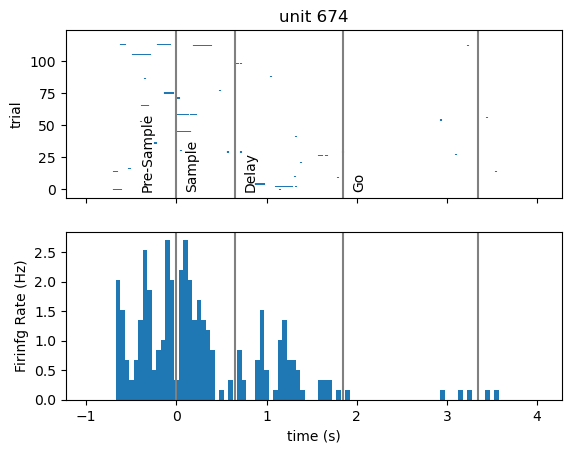

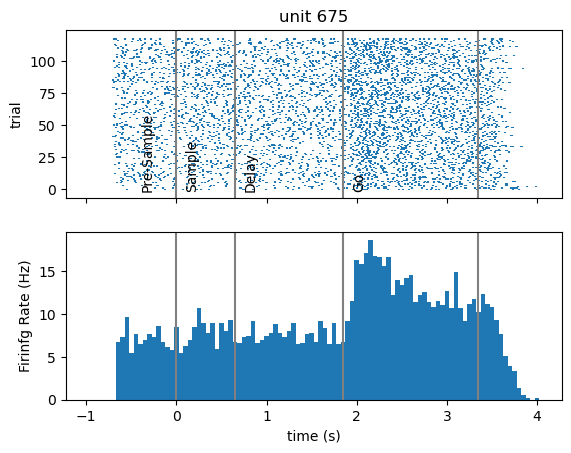

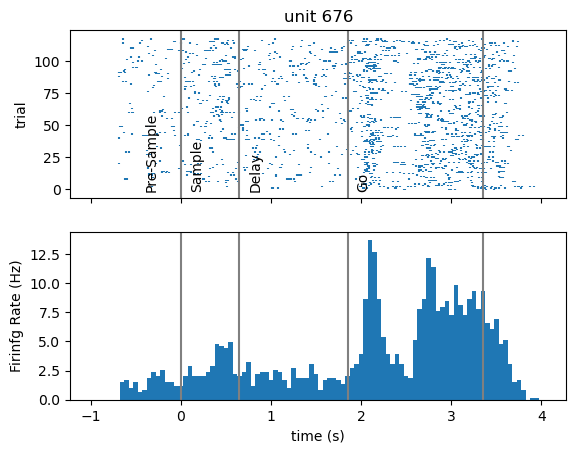

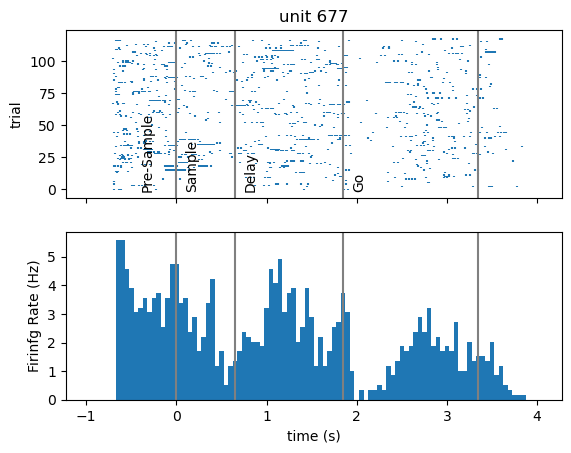

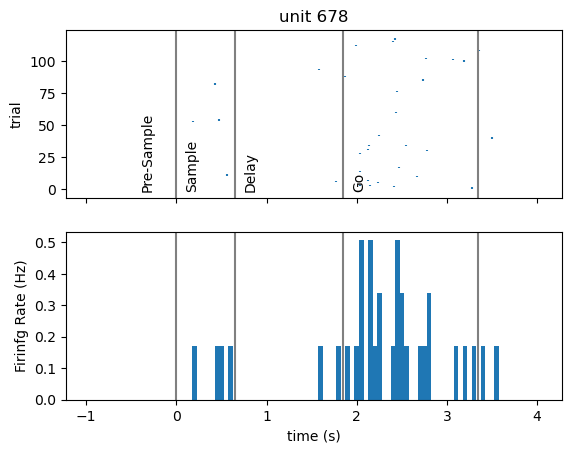

In [36]:
import seaborn as sns
trial_len = 5#sec
bin_size = 1/20
data_points = trial_len/bin_size
ids = trials_Data.reset_index().id

'''
Unit's Spike times will get align to trials start-stop timing and
we will get spike vector for that trial.
Everything is Centered(0sec point) is sample's start time
'''
on_times = trials_Data["start_time"]
off_times = trials_Data["stop_time"]
after = 4.3
before = -0.7
spike_data = []
for unit in units_Data.reset_index()['id'][:5]:
    unit_spike_times = units_Data["spike_times"][unit]
    trial_spikes = []
    i = 0
    for time in trials_Data['sample_start']:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        aligned_spikes = aligned_spikes[aligned_spikes < after ]
        i = i+1
        aligned_spikes = aligned_spikes[before < aligned_spikes]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    spike_data.append(trial_spikes)
    
    axs[0].eventplot(trial_spikes)
    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])
    axs[0].text(0.1,0,'Sample',rotation=90)
    axs[0].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[0].text(0.75,0,'Delay',rotation=90)
    axs[0].text(1.95,0,'Go',rotation=90)
    axs[0].text(-0.4,0,'Pre-Sample',rotation=90)
    axs[0].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[0].axvline(3.35, color=[0.5, 0.5, 0.5])
    
    hist, edges = np.histogram(np.hstack(trial_spikes), bins=(np.arange(data_points+1)*bin_size) - 1)
    freq = hist/len(trials_Data)/bin_size
    width = np.diff(edges)
    axs[1].bar(edges[1:], freq,width=width)
    
    # Add vertical lines at specific x-axis positions for epoch plotting
    axs[1].set_ylabel("Firinfg Rate (Hz)")
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])
    axs[1].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[1].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[1].axvline(3.35, color=[0.5, 0.5, 0.5])

Text(0, 0.5, 'Firing Rate (Hz)')

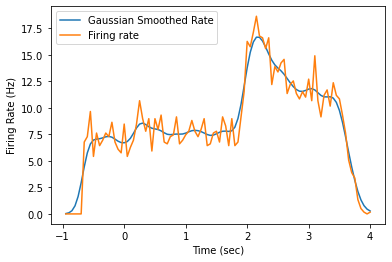

In [21]:
hist, edges = np.histogram(np.hstack(spike_data[1]), bins=(np.arange(data_points+1)*bin_size) - 1)
freq = (hist/len(trials_Data))/bin_size
width = np.diff(edges)
smooth_gauss = []

#Smoothening with GUASSIAN KERNEL
for i in edges[1:]:
    gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (0.1**2) ) )
    gauss /=  sum(gauss)
    smooth_gauss.append(sum(gauss*freq))
plt.plot(edges[1:],smooth_gauss)
plt.plot(edges[1:],freq)
plt.xlabel("Time (sec)")
plt.legend(['Gaussian Smoothed Rate','Firing rate'])
plt.ylabel("Firing Rate (Hz)")

# Gaussian Smoothing

In [42]:
'''
For both function

Input: Spike data(firing rate),sigma and other self explanatory inputs

Output: edges(time_vec), Gaussian smoothed Spike vector 

Process: Convert spike times into bins/vectors
- Use gaussian kernel to smooth the curves
'''

def plot_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(data_points+1)*bin_size) - 1)
    freq = (hist/len(dataset))/bin_size
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(data_points+1)*bin_size) - 1)
    freq = (hist/len(dataset))/bin_size
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

# Plotting firing rate plots for left and right trials

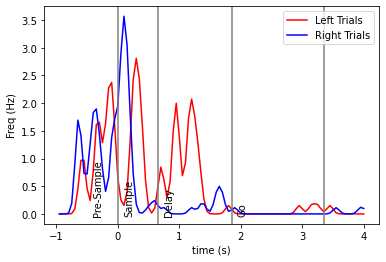

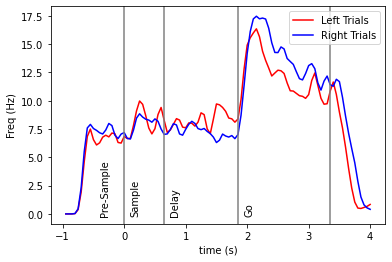

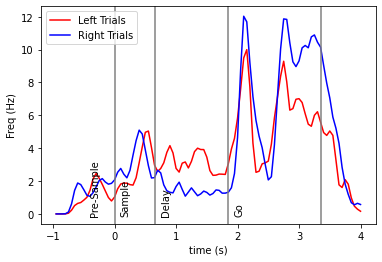

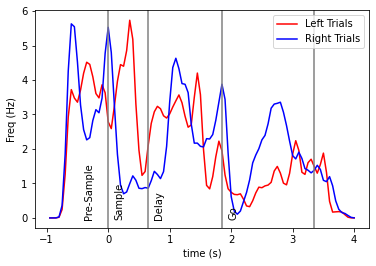

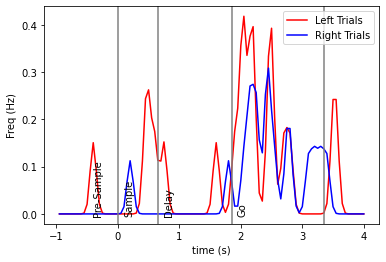

In [82]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
    '''
    Input: Sets of DataFrame(left and right Trials) AND Sigma
    
    Output: Plots of Firing Rate for left and right trial
    
    Process: Turning Spike times into Trials
    - Aligning spike time to sample start time
    - Getting Spike time vectors
    - Smoothning it
    - plotting it
    '''
    after = 4.3
    before = -0.7
    spike_data = []
    
    for unit in units_Data.reset_index()['id'][:5]:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes1 = unit_spike_times - time
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)            
            
        fig, axs = plt.subplots(1, 1, sharex="all")
        
        
        plt.xlabel("time (s)")
        
        plot_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
        plot_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
        axs.set_ylabel("Freq (Hz)")
        
        # Add vertical lines at specific x-axis positions for epoch plotting
        axs.axvline(0, color=[0.5, 0.5, 0.5])
        axs.axvline(0.65, color=[0.5, 0.5, 0.5])
        axs.axvline(1.85, color=[0.5, 0.5, 0.5])
        axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
        axs.text(0.1,0,'Sample',rotation=90)
        axs.text(0.75,0,'Delay',rotation=90)
        axs.text(1.95,0,'Go',rotation=90)
        axs.text(-0.4,0,'Pre-Sample',rotation=90)
        axs.legend(['Left Trials','Right Trials'])
get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [44]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    '''
    Input: Sets of DataFrame(left and right Trials) AND Sigma
    
    Output: left and right trial's firing rate(after smoothening) AND edges(time_vector)
    
    Process: Turning Spike times into Trials
    - Aligning spike time to sample start time
    - Getting Spike time vectors
    - Smoothning it
    - and returning(storing) it
    '''
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for unit in units_Data.reset_index()['id']:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            i = i+1
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_l.append(aligned_spikes)
            
        frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,trials_Data_L)    
        spike_data_l.append(smooth_l)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            i = i+1
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)
            
        frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,trials_Data_R)    
        spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

# Coding direction

In [52]:
offset = 1#sec (Because range is from [-1,4]and we need to centre it to zero)
Str_delay, Stp_delay = int((1.25+offset)/bin_size) , int((1.85+offset)/bin_size)

#Coding Direction for late Delay epoch
diff_cd = (np.array(l)-np.array(r))
delay_avg_diff = diff_cd[:,Str_delay:Stp_delay+1].mean(axis=1)
newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

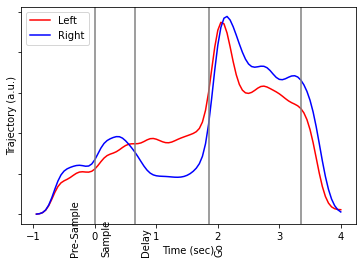

In [53]:
fig, axs = plt.subplots(1, 1, sharex="all")

# Plot two lines on the subplot with data from newly_l and newly_r against edges
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

axs.text(0.1,-2000,'Sample',rotation=90)
axs.text(0.75,-2000,'Delay',rotation=90)
axs.text(1.95,-2000,'Go',rotation=90)
axs.text(-0.4,-2000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# Incorrect Memory trials 

In [48]:
trials_Data.head()

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
3,24.0631,29.1689,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,24.5631,25.3602,25.3602,26.0102,26.0102,27.2102,27.2102,28.7102
8,60.1410,65.1748,9,N/A,N/A,N/A,9,audio delay,1,right,...,0,0,60.6410,61.3605,61.3605,62.0105,62.0105,63.2105,63.2105,64.7105
25,173.7197,178.9643,26,N/A,N/A,N/A,26,audio delay,1,left,...,1,0,174.2197,174.9517,174.9517,175.6017,175.6017,176.8017,176.8017,178.3017
27,190.8164,195.7693,28,N/A,N/A,N/A,28,audio delay,1,left,...,0,0,191.3164,192.0574,192.0574,192.7074,192.7074,193.9074,193.9074,195.4074
32,224.4209,229.2842,33,N/A,N/A,N/A,33,audio delay,1,left,...,0,0,224.9209,225.6153,225.6153,226.2653,226.2653,227.4653,227.4653,228.9653


In [54]:
Fail_trials = trials_df.query("photostim_onset != 'N/A' and (outcome == 'miss')")
Fail_trials = Fail_trials.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
Fail_trials = Fail_trials.query(" (stop_time - start_time) < 5.3")
#avg trial lenght is low
Fail_trials.head()

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
67,461.6791,465.1374,68,1.898,5.500,0.5000,68,audio delay,1,right,...,0,0,462.1791,462.9270,462.9270,463.5770,463.5770,464.7770,464.7770,466.2770
68,467.0819,470.6791,69,2.004,5.500,0.5000,69,audio delay,1,right,...,0,0,467.5819,468.4357,468.4357,469.0857,469.0857,470.2857,470.2857,471.7857
76,516.3124,519.9806,77,2.048,5.500,0.5000,77,audio delay,1,left,...,0,0,516.8124,517.7104,517.7104,518.3604,518.3604,519.5604,519.5604,521.0604
79,537.1248,540.4447,80,1.862,5.500,0.5000,80,audio delay,1,right,...,0,0,537.6248,538.3365,538.3365,538.9865,538.9865,540.1865,540.1865,541.6865
94,632.4705,635.9592,95,1.857,5.500,0.5000,95,audio delay,1,left,...,0,0,632.9705,633.6777,633.6777,634.3277,634.3277,635.5277,635.5277,637.0277


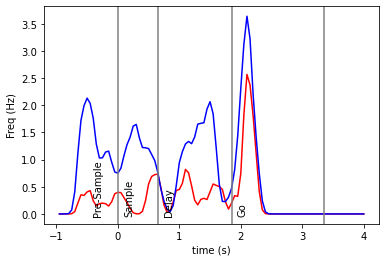

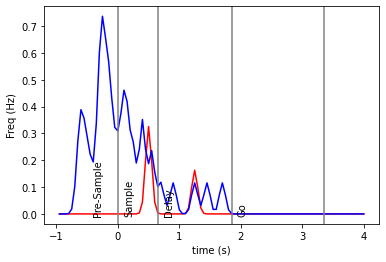

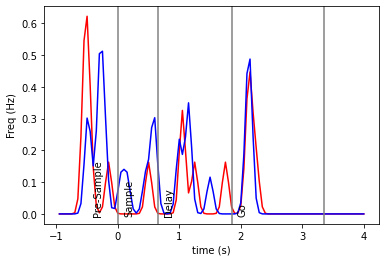

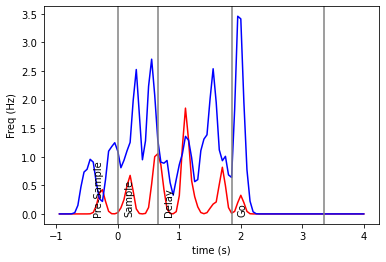

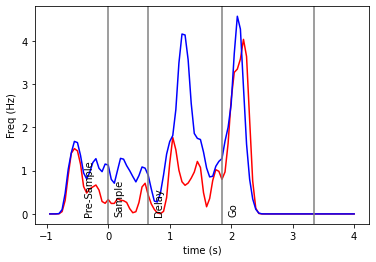

In [55]:
F_trials_Data_L = Fail_trials[ Fail_trials['trial_instruction'] == 'left']
F_trials_Data_R = Fail_trials[ Fail_trials['trial_instruction'] == 'right']
get_firing_rate_graph(F_trials_Data_L,F_trials_Data_R,0.05)

# Coding direction for incorrect trials

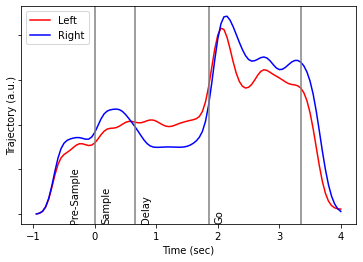

In [56]:
fl,fr,edges = get_firing_rate_over_neurons(F_trials_Data_L,F_trials_Data_R,0.1)

#Coding Direction Equation
diff_cd = (np.array(fr)-np.array(fl))
delay_avg_diff = diff_cd[:,Str_delay:Stp_delay+1].mean(axis=1)
newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

fig, axs = plt.subplots(1, 1, sharex="all")

# Plot two lines on the subplot with data from newly_l and newly_r against edges
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

axs.text(0.1,-300,'Sample',rotation=90)
axs.text(0.75,-300,'Delay',rotation=90)
axs.text(1.95,-300,'Go',rotation=90)
axs.text(-0.4,-300,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()